<a href="https://colab.research.google.com/github/farhannaliarain/DataScience/blob/main/20SW072_LAB_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB: 09

Roll no: 20SW072

Section: 2

TASKS

In [ ]:
import pandas as pd
df_rural = pd.read_csv('rural_population_percent.csv', skiprows=4)
df_electricity = pd.read_csv('electricity_access_percent.csv', skiprows=4)
df_rural.drop('Unnamed: 62', axis=1, inplace=True)
df_electricity.drop('Unnamed: 62', axis=1, inplace=True)
df = pd.concat([df_rural, df_electricity])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217000,56.579000,56.941000,57.302000,57.636000,57.942000,58.221000,58.472000,58.696000,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054000,75.687000,75.311000,74.926000,74.532000,74.129000,73.718000,73.297000,72.868000,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491000,60.701000,59.903000,59.100000,58.301000,57.510000,56.726000,55.950000,55.181000,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009000,48.924000,47.837000,46.753000,45.670000,44.617000,43.591000,42.593000,41.624000,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133000,11.648000,12.183000,12.740000,13.292000,13.835000,14.367000,14.885000,15.388000,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN


In [ ]:
df_rural_melt = pd.melt(df_rural,\
                        id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                       var_name = 'Year', value_name='Rural_Value')
df_electricity_melt = pd.melt(df_electricity,\
                              id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                             var_name='Year', value_name='Electricity_Value')

df_rural_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_electricity_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

df_merge = df_rural_melt.merge(df_electricity_melt, how='outer',\
                               on=['Country Name', 'Country Code', 'Year'])

df_combined = df_merge.sort_values(['Country Name', 'Year'])
df_combined

,Country Name,Country Code,Year,Rural_Value,Electricity_Value
1,Afghanistan,AFG,1960,91.779,NaN
265,Afghanistan,AFG,1961,91.492,NaN
529,Afghanistan,AFG,1962,91.195,NaN
793,Afghanistan,AFG,1963,90.890,NaN
1057,Afghanistan,AFG,1964,90.574,NaN
...,...,...,...,...,...
14255,Zimbabwe,ZWE,2013,67.346,37.076813
14519,Zimbabwe,ZWE,2014,67.499,32.300000
14783,Zimbabwe,ZWE,2015,67.624,33.700000
15047,Zimbabwe,ZWE,2016,67.723,38.145138


In [ ]:
import pandas as pd
df_projects = pd.read_csv('/content/projects_data.csv')

<ipython-input-7-3f08c2dc68e0>:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_projects = pd.read_csv('/content/projects_data.csv')


In [ ]:
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)

In [ ]:
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [ ]:
df_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [ ]:
df_projects.shape

(18248, 57)

In [ ]:
f = open('/content/population_data.csv')
for i in range(10):
    line = f.readline()
    print('line: ', i,  line)
f.close()

line:  0 ﻿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94

In [ ]:
df_population = pd.read_csv('/content/projects_data.csv', skiprows=4)
df_population.head()

<ipython-input-14-b011adfaea7b>:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_population = pd.read_csv('/content/projects_data.csv', skiprows=4)


,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
1,P161483,Middle East and North Africa,Republic of Tunisia;Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P161885,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P162069,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P163540,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_population.isnull().sum()

P158768                                                                   0
South Asia                                                                0
Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan         0
PE                                                                        0
Investment Project Financing                                            246
IN                                                                      246
A                                                                      5810
N                                                                        53
L                                                                         0
Active                                                                    4
Active.1                                                                  4
Public-Private Partnerships and Public Investment Advisory Project        0
2018-06-27T00:00:00Z                                                   1504
June        

In [ ]:
df_population.isnull().sum(axis=1)

0        23
1        33
2        34
3        33
4        34
         ..
18239    33
18240    33
18241    33
18242    33
18243    33
Length: 18244, dtype: int64

In [ ]:
df_population.columns

Index(['P158768', 'South Asia',
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'PE', 'Investment Project Financing', 'IN', 'A', 'N', 'L', 'Active',
       'Active.1',
       'Public-Private Partnerships and Public Investment Advisory Project',
       '2018-06-27T00:00:00Z', 'June', '2023-06-28T00:00:00Z', '50,000,000',
       '0', '20,000,000', '20,000,000.1', '0.1', 'IIST', 'IIST.1',
       'http://projects.worldbank.org/P158768?lang=en', 'Unnamed: 23',
       'Unnamed: 24', '!$!0', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', '!$!0.1',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 5

In [ ]:
df_population = df_population.drop(['http://projects.worldbank.org/P158768?lang=en', 'Unnamed: 23',
       'Unnamed: 24', '!$!0', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', '!$!0.1',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56'], axis=1)

In [ ]:
df_population[df_population.isnull().any(axis=1)]

,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z,"50,000,000",0,"20,000,000","20,000,000.1",0.1,IIST,IIST.1
0,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z,"100,000,000",0,"100,000,000","100,000,000",0,NaN,NaN
1,P161483,Middle East and North Africa,Republic of Tunisia;Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z,"500,000,000","500,000,000",0,"500,000,000",0,EET,IIST
2,P161885,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z,"765,000,000",0,"350,000,000","350,000,000",0,NaN,NaN
3,P162069,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z,"232,000,000",0,"225,000,000","225,000,000",0,CIATI,NaN
4,P163540,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,C,N,L,Active,...,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z,"125,000,000",0,"125,000,000","125,000,000",0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18239,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,1948-03-25T00:00:00Z,March,1954-12-31T00:00:00Z,"13,500,000","13,500,000",0,"13,500,000",0,NaN,NaN
18240,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,1947-08-28T00:00:00Z,August,1949-03-31T00:00:00Z,"12,000,000","12,000,000",0,"12,000,000",0,NaN,NaN
18241,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,1947-08-22T00:00:00Z,August,1949-03-31T00:00:00Z,"40,000,000","40,000,000",0,"40,000,000",0,NaN,NaN
18242,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,1947-08-07T00:00:00Z,August,1948-06-30T00:00:00Z,"195,000,000","195,000,000",0,"195,000,000",0,NaN,NaN


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [ ]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

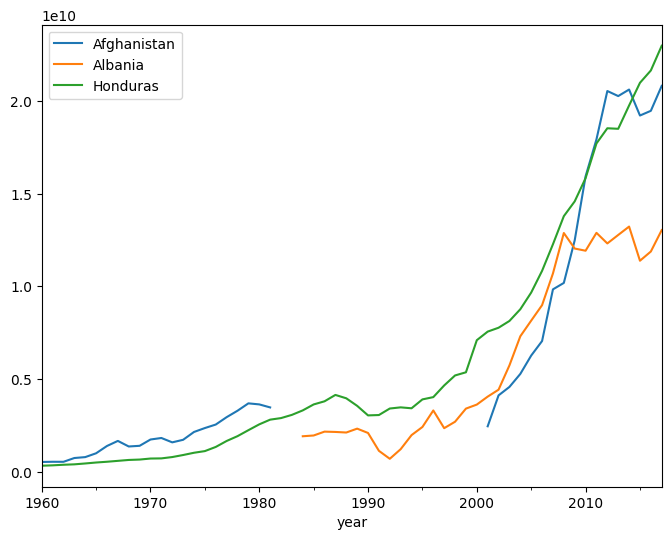

In [ ]:
import matplotlib.pyplot as plt

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') |
            (df_melt['Country Name'] == 'Albania') |
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])

plot_results('GDP')

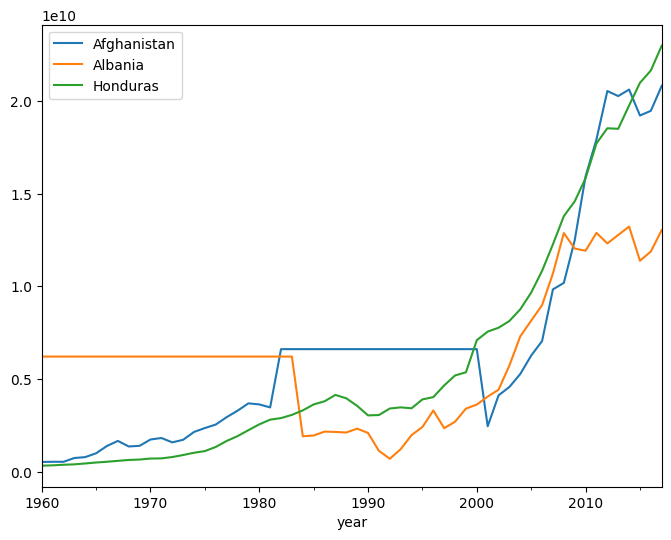

In [ ]:
df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))
# Plot the results
plot_results('GDP_filled')

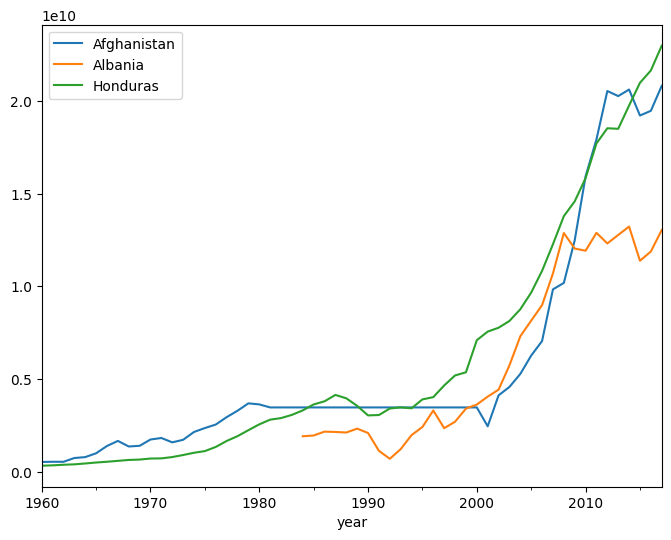

In [ ]:
df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')
# plot the results
plot_results('GDP_ffill')

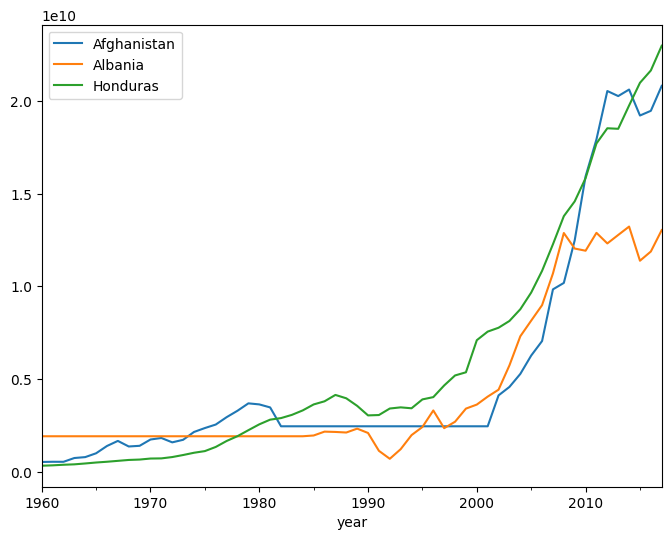

In [ ]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')
# plot the results
plot_results('GDP_bfill')

In [ ]:
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

In [ ]:
import pandas as pd

# read in the projects data set and do some basic wrangling
projects = pd.read_csv('/content/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# TODO: filter the data frame for projects over 1 billion dollars
# TODO: count the number of unique countries in the results
projects[projects['totalamt'] > 1000000000]['countryname'].nunique()

17

In [ ]:
projects[projects['countryname'].str.contains('Yugoslavia')]

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
11166,P009285,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,A,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11410,P009231,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,B,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11479,P009219,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11694,P009225,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11695,P009275,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,P009137,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17963,P009136,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18175,P009135,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
projects['boardapprovaldate'].head()

0   2018-06-28 00:00:00+00:00
1   2018-06-28 00:00:00+00:00
2   2018-06-28 00:00:00+00:00
3   2018-06-27 00:00:00+00:00
4   2018-06-27 00:00:00+00:00
Name: boardapprovaldate, dtype: datetime64[ns, UTC]

In [ ]:
import datetime

# TODO: filter the projects data set for project boardapprovaldate prior to April 27th, 1992 AND with countryname
#  of either 'Bosnia and Herzegovina', 'Croatia', 'Kosovo', 'Macedonia', 'Serbia', or 'Sovenia'. Store the
#  results in the republics variable
republics = projects[(projects['boardapprovaldate'] < '1993-04-27 00:00:00+00:00') &
         ((projects['countryname'].str.contains('Bosnia')) |
         (projects['countryname'].str.contains('Croatia')) |
         (projects['countryname'].str.contains('Kosovo')) |
         (projects['countryname'].str.contains('Macedonia')) |
         (projects['countryname'].str.contains('Montenegro')) |
         (projects['countryname'].str.contains('Serbia')) |
         (projects['countryname'].str.contains('Slovenia')))][['regionname',
                                                                   'countryname',
                                                                   'lendinginstr',
                                                                   'totalamt',
                                                                   'boardapprovaldate',
                                                               'location',
                                                               'GeoLocID',
                                                               'GeoLocName',
                                                               'Latitude',
                                                               'Longitude',
                                                               'Country',
                                                               'project_name']].sort_values('boardapprovaldate')

republics

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13973,Europe and Central Asia,Macedonia,Specific Investment Loan,24000000,1980-02-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture & Agroindustry 2 Project (Macedonia)
13048,Europe and Central Asia,Bosnia and Herzegovina,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13049,Europe and Central Asia,Republic of Croatia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13050,Europe and Central Asia,Macedonia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13051,Europe and Central Asia,Republic of Slovenia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
12226,Europe and Central Asia,Republic of Slovenia,Financial Intermediary Loan,0,1987-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,IND.ENERGY EFFIC. I
12228,Europe and Central Asia,Republic of Croatia,Financial Intermediary Loan,0,1987-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,IND.ENERGY EFFIC. I
12061,Europe and Central Asia,Republic of Croatia,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II
12062,Europe and Central Asia,Republic of Croatia,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II
12063,Europe and Central Asia,Bosnia and Herzegovina,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II


In [ ]:
yugoslavia = projects[(projects['countryname'].str.contains('Yugoslavia')) &
         (projects['boardapprovaldate'] >= '1980-02-01 00:00:00+00:00') &
         (projects['boardapprovaldate'] <= '1989-05-23 00:00:00+00:00')][['regionname',
                                                                   'countryname',
                                                                   'lendinginstr',
                                                                   'totalamt',
                                                                   'boardapprovaldate',
                                                               'location',
                                                               'GeoLocID',
                                                               'GeoLocName',
                                                               'Latitude',
                                                               'Longitude',
                                                               'Country',
                                                                        'project_name']].sort_values('boardapprovaldate')
yugoslavia

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13966,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,86000000,1980-02-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture Credit Project (03)
13937,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,125000000,1980-03-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Highway Project (11)
13773,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,110000000,1980-10-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (05)
13706,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,87000000,1981-03-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Morava Regional Development Project (02)
13647,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,34000000,1981-04-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Railway Project
13629,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,90000000,1981-05-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Agriculture Development Project
13555,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,80000000,1981-07-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Macedonia Agriculture Development Project (03)
13526,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,41000000,1981-11-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Water Supply Project
13412,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,66000000,1982-04-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (06)
13402,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,35000000,1982-05-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Bosnia Herzegovina Agriculture Development Pro...


In [ ]:
import numpy as np

# TODO: find the unique dates in the republics variable
republic_unique_dates = republics['boardapprovaldate'].unique()

# TODO: find the unique dates in the yugoslavia variable
yugoslavia_unique_dates = yugoslavia['boardapprovaldate'].unique()

# TODO: make a list of the results appending one list to the other
dates = np.append(republic_unique_dates, yugoslavia_unique_dates)

# TODO: print out the dates that appeared twice in the results
unique_dates, count = np.unique(dates, return_counts=True)

for i in range(len(unique_dates)):
    if count[i] == 2:
        print(unique_dates[i])

1983-07-26 00:00:00+00:00
1987-03-31 00:00:00+00:00
1987-10-13 00:00:00+00:00
1989-05-23 00:00:00+00:00


In [ ]:
import datetime

# run this code cell to see the duplicate data
pd.concat([yugoslavia[yugoslavia['boardapprovaldate'] == '1983-07-26 00:00:00+00:00'], republics[republics['boardapprovaldate'] == datetime.date(1983, 7, 26)]])

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13046,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,70000000,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (07)
13047,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,120000000,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Power Transmission Project (03) Energy Managem...


In [ ]:
def print_lines(n, file_name):
    f = open(file_name)
    for i in range(n):
        print(f.readline())
    f.close()

print_lines(1, '/content/population_data.json')

[{"Country Name":"Aruba","Country Code":"ABW","Indicator Name":"Population, total","Indicator Code":"SP.POP.TOTL","1960":54211.0,"1961":55438.0,"1962":56225.0,"1963":56695.0,"1964":57032.0,"1965":57360.0,"1966":57715.0,"1967":58055.0,"1968":58386.0,"1969":58726.0,"1970":59063.0,"1971":59440.0,"1972":59840.0,"1973":60243.0,"1974":60528.0,"1975":60657.0,"1976":60586.0,"1977":60366.0,"1978":60103.0,"1979":59980.0,"1980":60096.0,"1981":60567.0,"1982":61345.0,"1983":62201.0,"1984":62836.0,"1985":63026.0,"1986":62644.0,"1987":61833.0,"1988":61079.0,"1989":61032.0,"1990":62149.0,"1991":64622.0,"1992":68235.0,"1993":72504.0,"1994":76700.0,"1995":80324.0,"1996":83200.0,"1997":85451.0,"1998":87277.0,"1999":89005.0,"2000":90853.0,"2001":92898.0,"2002":94992.0,"2003":97017.0,"2004":98737.0,"2005":100031.0,"2006":100832.0,"2007":101220.0,"2008":101353.0,"2009":101453.0,"2010":101669.0,"2011":102053.0,"2012":102577.0,"2013":103187.0,"2014":103795.0,"2015":104341.0,"2016":104822.0,"2017":105264.0},{"

In [ ]:
import pandas as pd
df_json = pd.read_json('/content/population_data.json', orient='records')
# TODO: Use the head method to see the first few rows of the resulting
# dataframe
df_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
import json

# read in the JSON file
with open('/content/population_data.json') as f:
    json_data = json.load(f)

# print the first record in the JSON file
print(json_data[0])
print('\n')

# show that JSON data is essentially a dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

In [ ]:
print_lines(15, '/content/population_data.xml')

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



In [8]:
from bs4 import BeautifulSoup

# open the population_data.xml file and load into Beautiful Soup
with open("/content/population_data.xml") as fp:
    soup = BeautifulSoup(fp, "lxml") # lxml is the Parser type
# output the first 5 records in the xml file
# this is an example of how to navigate with BeautifulSoup

i = 0
# use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    # use the find_all method to get all fields in each record
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:
        break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



# New Section

In [ ]:
data_dictionary = {'Country or Area':[], 'Year':[], 'Item':[], 'Value':[]}

for record in soup.find_all('record'):
    for record in record.find_all('field'):
        data_dictionary[record['name']].append(record.text)

df = pd.DataFrame.from_dict(data_dictionary)
df = df.pivot(index='Country or Area', columns='Year', values='Value')
df.reset_index(level=0, inplace=True)
df.head()

Year,Country or Area,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8996351,9166764,9345868,9533954,9731361,9938414,10152331,10372630,10604346,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
1,Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
2,Algeria,11124888,11404859,11690153,11985136,12295970,12626952,12980267,13354197,13744387,...,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528,40606052,41318142
3,American Samoa,20013,20486,21117,21882,22698,23520,24321,25116,25885,...,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
4,Andorra,13411,14375,15370,16412,17469,18549,19647,20758,21890,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [11]:
import pandas as pd

# read in the population data and drop the final column
df_indicator = pd.read_csv('/content/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [ ]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

In [18]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

In [13]:
!pip install pycountry
from pycountry import countries

In [15]:
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [16]:
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [19]:
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# TODO: iterate through the country names in df_projects.
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try:
        # TODO: look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

In [ ]:
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


In [20]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

In [21]:
df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])
# Run this code cell to see which projects in the df_projects data frame still have no country code abbreviation.
# In other words, these projects do not have a matching population value in the df_indicator data frame.
df_projects[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan,
10,P163721,South Asia,Democratic Socialist Republic of Sri Lan;Democ...,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Socialist Republic of Sri Lan,
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar;Republic of t...,RE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of the Union of Myanmar,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia;Socia...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Socialist Federal Republic of Yugoslavia,
18200,P003006,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,
18219,P008109,Latin America and Caribbean,Oriental Republic of Uruguay;Oriental Republic...,PE,Sector Investment and Maintenance Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oriental Republic of Uruguay,
18220,P037342,East Asia and Pacific,Commonwealth of Australia;Commonwealth of Aust...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commonwealth of Australia,


In [23]:
import pandas as pd

# read in the population data and drop the final column
df_indicator = pd.read_csv('/content/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [24]:
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') |
             (df_indicator['Country Name'] == 'United States') |
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]

df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

In [25]:
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [26]:
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [27]:
df_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

In [28]:
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG


In [29]:
import pandas as pd
import numpy as np

# read in the projects data set and do basic wrangling
gdp = pd.read_csv('/content/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('/content/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


<Axes: >

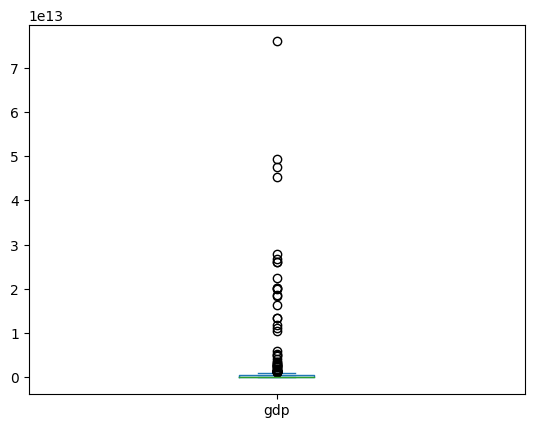

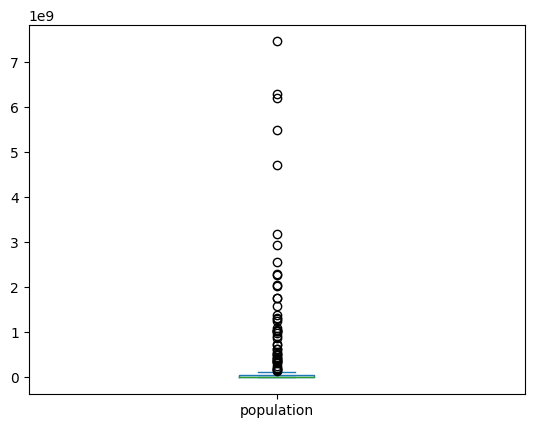

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Make a boxplot of the population data for the year 2016
df_2016.plot('population', kind='box')

# TODO: Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp', kind='box')

In [31]:
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = population_2016['population'].quantile(0.25)

# TODO: Calculate the third quartile of the population values
Q3 = population_2016['population'].quantile(0.75)

# TODP: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


In [32]:
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = gdp_2016['gdp'].quantile(0.25)

# TODO: Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# TODP: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14789,Arab World,2.500164e+12
14795,Australia,1.208039e+12
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14818,Central Europe and the Baltics,1.313067e+12
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14843,East Asia & Pacific (excluding high income),1.350933e+13
14844,Early-demographic dividend,1.043743e+13
14845,East Asia & Pacific,2.251217e+13


In [33]:
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
# TODO: Re-rerun the Tukey code with this filtered data to find population outliers

# TODO: Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = population_2016['population'].quantile(0.25)

# TODO: Calculate the third quartile of the population values
Q3 = population_2016['population'].quantile(0.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


In [34]:
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method
Q1 = gdp_2016['gdp'].quantile(0.25)

# TODO: Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14796,Austria,3.908000e+11
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


In [35]:
list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['Indonesia',
 'Russian Federation',
 'United Kingdom',
 'Thailand',
 'France',
 'India',
 'Iran, Islamic Rep.',
 'Japan',
 'China',
 'Nigeria',
 'Mexico',
 'Italy',
 'Turkey',
 'United States',
 'Brazil',
 'Germany']

In [36]:
list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['Bangladesh',
 'Pakistan',
 'Egypt, Arab Rep.',
 'Philippines',
 'Ethiopia',
 'Vietnam',
 'Congo, Dem. Rep.']

In [37]:
# TODO: Find country names that are in the gdp outliers list but not the population outliers list
# HINT: Python's set() and list() methods should be helpful

list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Switzerland',
 'Spain',
 'Australia',
 'Belgium',
 'Canada',
 'Netherlands',
 'Poland',
 'Venezuela, RB',
 'Austria',
 'Saudi Arabia',
 'Sweden',
 'Argentina',
 'Korea, Rep.']

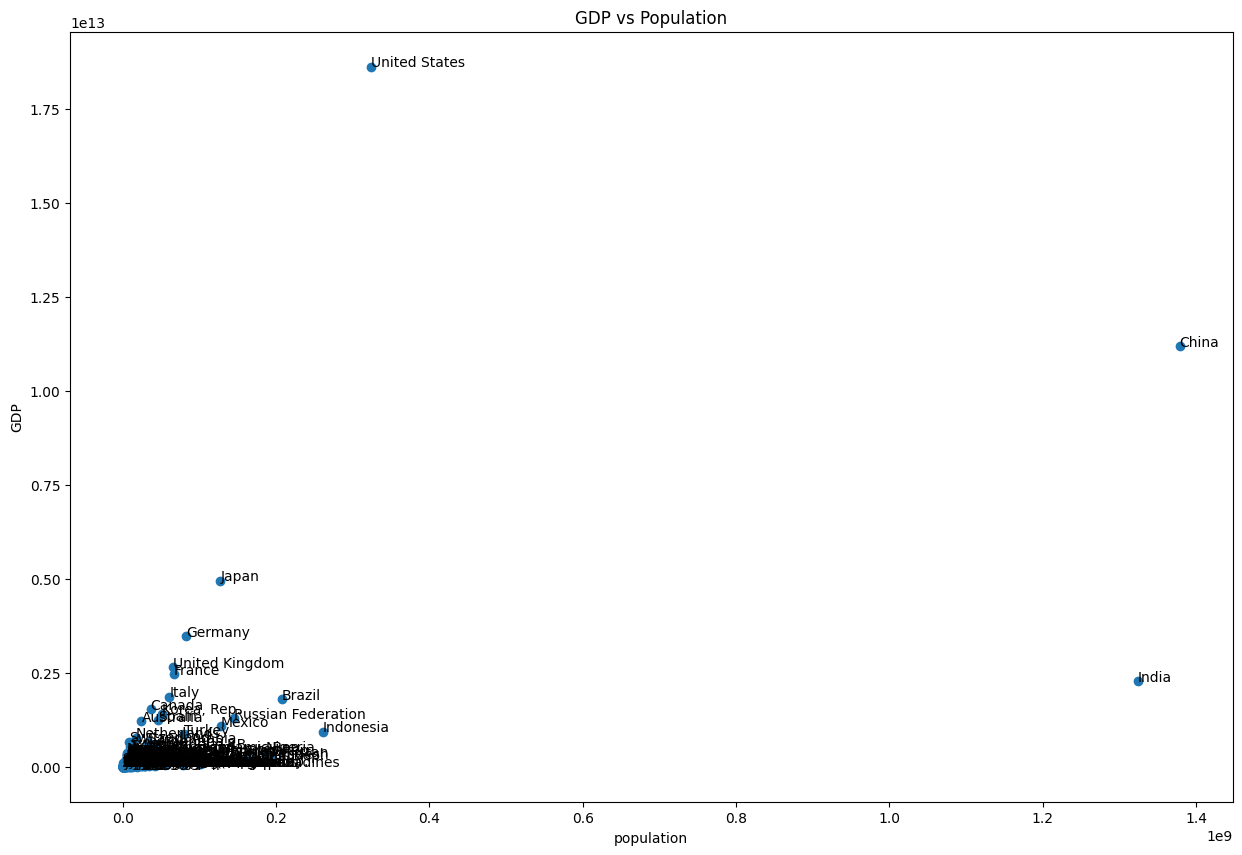

In [38]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))


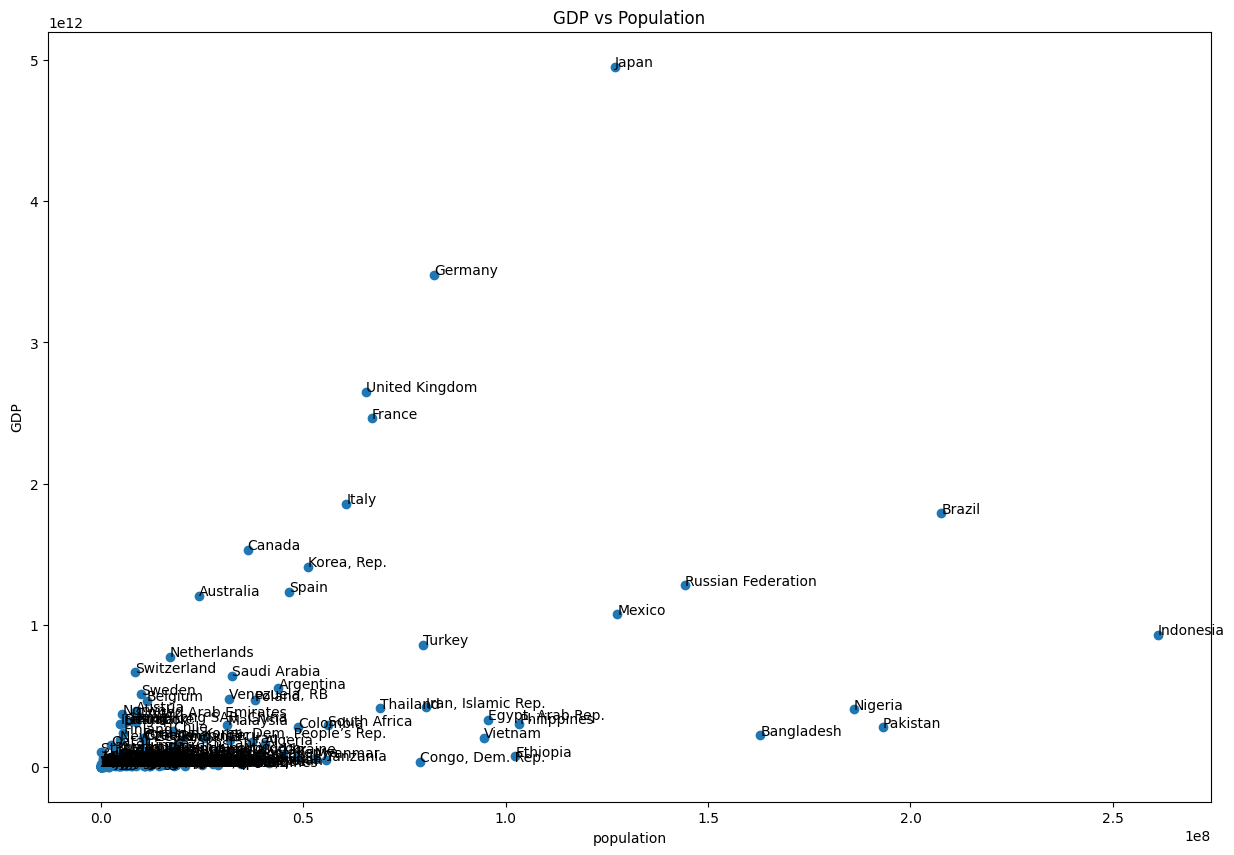

In [39]:
# Run the code below to see the results
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

[[6.54170378e+12]]


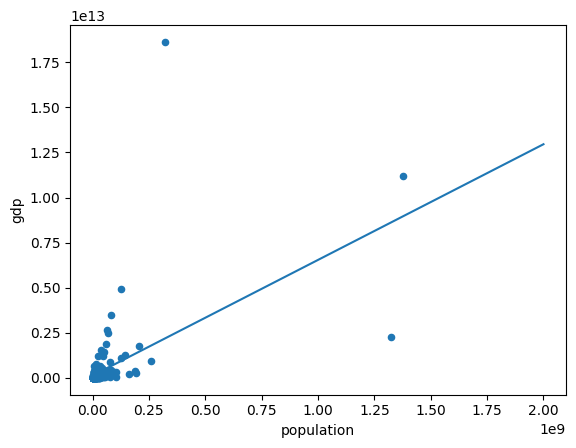

In [40]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

[[5.25824554e+12]]


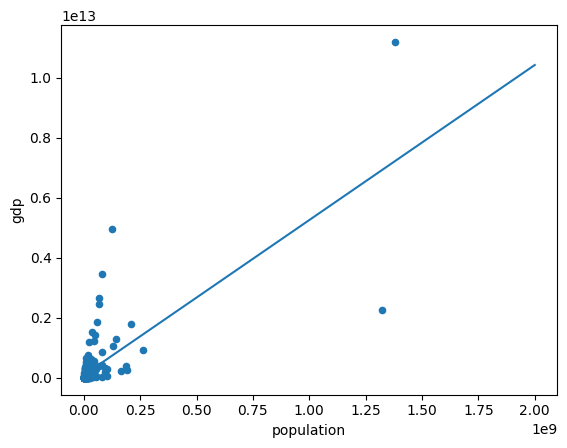

In [41]:
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1),
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

In [42]:
import sqlite3
import pandas as pd

# connect to the database
conn = sqlite3.connect('/content/population_data.db')

# run a query
pd.read_sql('SELECT * FROM population_data', conn)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [43]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


In [44]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 252,
  'sourceid': '2',
  'lastupdated': '2023-09-19'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 215313498,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 214326223,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 213196304,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',

In [45]:
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,215313498,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,214326223,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,213196304,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211782878,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,210166592,,,0
...,...,...,...,...,...,...,...,...
247,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
248,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
249,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
250,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


In [46]:
url = 'http://api.worldbank.org/v2/countries/ch/indicators/SP.RUR.TOTL/?format=json&date=1995:2001'

# TODO: send the request
r = requests.get(url)

# TODO: output the json using the json method like in the previous example
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 7,
  'sourceid': '2',
  'lastupdated': '2023-09-19'},
 [{'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2001',
   'value': 1924949,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2000',
   'value': 1912232,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '1999',
   'value': 1897587,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in the projects data set and do basic wrangling
gdp = pd.read_csv('/content/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('/content/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


In [48]:
def x_min_max(data):
    # TODO: Complete this function called x_min_max()
    # The input is an array of data as an input
    # The outputs are the minimum and maximum of that array
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum

# this should give the result (36572611.88531479, 18624475000000.0)
x_min_max(df_2016['gdp'])

(36572611.8853148, 18624475000000.0)

In [49]:
def normalize(x, x_min, x_max):
    # TODO: Complete this function
    # The input is a single value
    # The output is the normalized value
    return (x - x_min) / (x_max - x_min)

In [50]:
class Normalizer():
    # TODO: Complete the normalizer class
    # The normalizer class receives a dataframe as its only input for initialization
    # For example, the data frame might contain gdp and population data in two separate columns
    # Follow the TODOs in each section

    def __init__(self, dataframe):

        # TODO: complete the init function.
        # Assume the dataframe has an unknown number of columns like [['gdp', 'population']]
        # iterate through each column calculating the min and max for each column
        # append the results to the params attribute list

        # For example, take the gdp column and calculate the minimum and maximum
        # Put these results in a list [minimum, maximum]
        # Append the list to the params variable
        # Then take the population column and do the same

        # HINT: You can put your x_min_max() function as part of this class and use it

        self.params = []

        for column in dataframe.columns:
            self.params.append(x_min_max(dataframe[column]))

    def x_min_max(data):
        # TODO: complete the x_min_max method
        # HINT: You can use the same function defined earlier in the exercise
        minimum = min(data)
        maximum = max(data)
        return minimum, maximum

    def normalize_data(self, x):
        # TODO: complete the normalize_data method
        # The function receives a data point as an input and then outputs the normalized version
        # For example, if an input data point of [gdp, population] were used. Then the output would
        # be the normalized version of the [gdp, population] data point
        # Put the results in the normalized variable defined below

        # Assume that the columns in the dataframe used to initialize an object are in the same
        # order as this data point x

        # HINT: You cannot use the normalize_data function defined earlier in the exercise.
        # You'll need to iterate through the individual values in the x variable
        # Use the params attribute where the min and max values are stored
        normalized = []
        for i, value in enumerate(x):
            x_max = self.params[i][1]
            x_min = self.params[i][0]
            normalized.append((x[i] - x_min) / (x_max - x_min))
        return normalized

gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])
# This cell should output: [(36572611.88531479, 18624475000000.0), (11097.0, 1378665000.0)]
gdp_normalizer.params

[(36572611.8853148, 18624475000000.0), (11097.0, 1378665000.0)]

In [51]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[0.7207969507229194, 0.9429407193285986]

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in the projects data set and do basic wrangling
gdp = pd.read_csv('/content/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('/content/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
df_2016.reset_index(inplace=True, drop=True)

In [53]:
df_2016['gdppercapita'] = df_2016['gdp'] / df_2016['population']

In [54]:
def create_multiples(b, k):

    new_features = []

    # TODO: use a for loop to make a list of multiples of b: ie b^2, b^3, b^4, etc... until b^k
    for i in range(2,k+1):
        new_features.append(b ** i)

    return new_features

# TODO: Fill out the column_name_generator function.
# The function has two inputs: a string representing a column name and an integer k.
# The 'k' variable is the same as the create_multiples function.
# The output should be a list of column names.
# For example if the inputs are ('gdp', 4) then the output is a list of strings ['gdp2', 'gdp3', gdp4']
def column_name_generator(colname, k):

    col_names = []
    for i in range(2,k+1):
        col_names.append('{}{}'.format(colname, i))
    return col_names

# TODO: Fill out the concatenate_features function.
# The function has three inputs. A dataframe, a column name represented by a string, and an integer representing
# the maximum power to create when engineering features.

# If the input is (df_2016, 'gdp', 3), then the output will be the df_2016 dataframe with two new columns
# One new column will be 'gdp2' ie gdp^2, and then other column will be 'gdp3' ie gdp^3.

# HINT: There may be more than one way to do this.
# The TODOs in this section point you towards one way that works
def concatenate_features(df, column, num_columns):

    # TODO: Use the pandas apply() method to create the new features. Inside the apply method, you
    # can use a lambda function with the create_mtuliples function
    new_features = df[column].apply(lambda x: create_multiples(x, num_columns))

    # TODO: Create a dataframe from the new_features variable
    # Use the column_name_generator() function to create the column names

    # HINT: In the pd.DataFrame() method, you can specify column names inputting a list in the columns option
    # HINT: Using new_features.tolist() might be helpful
    new_features_df = pd.DataFrame(new_features.tolist(), columns = column_name_generator(column, num_columns))

    # TODO: concatenate the original date frame in df with the new_features_df dataframe
    # return this concatenated dataframe
    return pd.concat([df, new_features_df], axis=1)

In [55]:
concatenate_features(df_2016, 'gdp', 4)

,Country Name,year,gdp,population,gdppercapita,gdp2,gdp3,gdp4
0,Aruba,2016,2.584464e+09,104822.0,24655.737223,6.679453e+18,1.726280e+28,4.461509e+37
1,Afghanistan,2016,1.946902e+10,34656032.0,561.778746,3.790428e+20,7.379593e+30,1.436735e+41
2,Angola,2016,9.533720e+10,28813463.0,3308.772828,9.089182e+21,8.665372e+32,8.261324e+43
3,Albania,2016,1.188368e+10,2876101.0,4131.872341,1.412219e+20,1.678236e+30,1.994363e+40
4,Andorra,2016,2.877312e+09,77281.0,37231.815671,8.278924e+18,2.382105e+28,6.854058e+37
...,...,...,...,...,...,...,...,...
212,Kosovo,2016,6.715487e+09,1816200.0,3697.548026,4.509776e+19,3.028534e+29,2.033808e+39
213,"Yemen, Rep.",2016,1.821333e+10,27584213.0,660.280885,3.317253e+20,6.041823e+30,1.100417e+41
214,South Africa,2016,2.957627e+11,56015473.0,5280.017633,8.747557e+22,2.587201e+34,7.651975e+45
215,Zambia,2016,2.095475e+10,16591390.0,1262.989682,4.391017e+20,9.201269e+30,1.928103e+41


In [56]:
import numpy as np
import pandas as pd
#visualize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


pokemon=pd.read_csv('/content/pokemon.csv')


print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,identifier,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [57]:
pokemon.isnull().sum()

id                   0
identifier           0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [58]:
pokemon.dropna(axis=0, inplace=True)


pokemon.head()

,id,identifier,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
11,12,butterfree,1,1.1,32.0,178,bug,flying,60,45,50,70,90,80


In [59]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 805
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               405 non-null    int64  
 1   identifier       405 non-null    object 
 2   generation_id    405 non-null    int64  
 3   height           405 non-null    float64
 4   weight           405 non-null    float64
 5   base_experience  405 non-null    int64  
 6   type_1           405 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               405 non-null    int64  
 9   attack           405 non-null    int64  
 10  defense          405 non-null    int64  
 11  speed            405 non-null    int64  
 12  special-attack   405 non-null    int64  
 13  special-defense  405 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 47.5+ KB


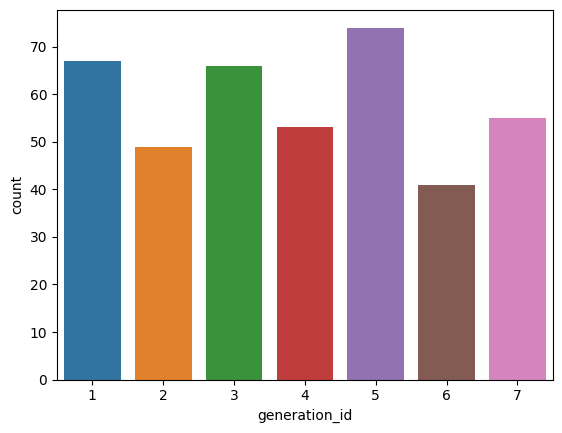

In [60]:
sb.countplot(data=pokemon, x='generation_id');

In [62]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

# get a cursor
cur = conn.cursor()

# drop the test table in case it already exists
cur.execute("DROP TABLE IF EXISTS gdp")

# create the test table including project_id as a primary key
cur.execute("CREATE TABLE gdp (countryname TEXT, countrycode TEXT, year INTEGER, gdp REAL, PRIMARY KEY (countrycode, year));")

conn.commit()
conn.close()
# Generator for reading in one line at a time
# generators are useful for data sets that are too large to fit in RAM
# You do not need to change anything in this code cell
def extract_lines(file):
    while True:
        line = file.readline()
        if not line:
            break
        yield line
# TODO: fill out the code wherever you find a TODO in this cell
# This function has two inputs:
#   data, which is a row of data from the gdp csv file
#   colnames, which is a list of column names from the csv file
# The output should be a list of [countryname, countrycode, year, gdp] values
# In other words, the output would look like:
# [[Aruba, ABW, 1994, 1.330168e+09], [Aruba, ABW, 1995, 1.320670e+09], ...]
#

import pandas as pd
import numpy as np
import sqlite3

# transform the indicator data
def transform_indicator_data(data, colnames):

    # get rid of quote marks
    for i, datum in enumerate(data):
        data[i] = datum.replace('"','')

    # TODO: the data variable contains a list of data in the form [countryname, countrycode, 1960, 1961, 1962,...]
    # since this is the format of the data in the csv file. Extract the countryname from the list
    # and put the result in the country variable
    country = None

    # these are "countryname" values that are not actually countries
    non_countries = ['World',
     'High income',
     'OECD members',
     'Post-demographic dividend',
     'IDA & IBRD total',
     'Low & middle income',
     'Middle income',
     'IBRD only',
     'East Asia & Pacific',
     'Europe & Central Asia',
     'North America',
     'Upper middle income',
     'Late-demographic dividend',
     'European Union',
     'East Asia & Pacific (excluding high income)',
     'East Asia & Pacific (IDA & IBRD countries)',
     'Euro area',
     'Early-demographic dividend',
     'Lower middle income',
     'Latin America & Caribbean',
     'Latin America & the Caribbean (IDA & IBRD countries)',
     'Latin America & Caribbean (excluding high income)',
     'Europe & Central Asia (IDA & IBRD countries)',
     'Middle East & North Africa',
     'Europe & Central Asia (excluding high income)',
     'South Asia (IDA & IBRD)',
     'South Asia',
     'Arab World',
     'IDA total',
     'Sub-Saharan Africa',
     'Sub-Saharan Africa (IDA & IBRD countries)',
     'Sub-Saharan Africa (excluding high income)',
     'Middle East & North Africa (excluding high income)',
     'Middle East & North Africa (IDA & IBRD countries)',
     'Central Europe and the Baltics',
     'Pre-demographic dividend',
     'IDA only',
     'Least developed countries: UN classification',
     'IDA blend',
     'Fragile and conflict affected situations',
     'Heavily indebted poor countries (HIPC)',
     'Low income',
     'Small states',
     'Other small states',
     'Not classified',
     'Caribbean small states',
     'Pacific island small states']

    # filter out country name values that are in the above list
    if country not in non_countries:

        # In this section, you'll convert the single row of data into a data frame
        # The advantage of converting a single row of data into a data frame is that you can
        # re-use code from earlier in the lesson to clean the data

        # TODO: convert the data variable into a numpy array
        # Use the ndmin=2 option
        data_array = None

        # TODO: reshape the data_array so that it is one row and 63 columns
        data_array = None

        # TODO: convert the data_array variable into a pandas dataframe
        # Note that you can specify the column names as well using the colnames variable
        # Also, replace all empty strings in the dataframe with nan (HINT: Use the replace module and np.nan)
        df = None

        # TODO: Drop the 'Indicator Name' and 'Indicator Code' columns

        # TODO: Reshape the data sets so that they are in long format
        # The id_vars should be Country Name and Country Code
        # You can name the variable column year and the value column gdp
        # HINT: Use the pandas melt() method
        # HINT: This was already done in a previous exercise
        df_melt = None

        # TODO: Iterate through the rows in df_melt
        # For each row, extract the country, countrycode, year, and gdp values into a list like this:
        #     [country, countrycode, year, gdp]
        # If the gdp value is not null, append the row (in the form of a list) to the results variable
        # Finally, return the results list after iterating through the df_melt data
        # HINT: the iterrows() method would be useful
        # HINT: to check if gdp is equal to nan, you might want to convert gdp to a string and compare to the
        #       string 'nan
        results = []

        return results
# TODO: fill out the code wherever you find a TODO in this cell
# This function loads data into the gdp table of the worldbank.db database
# The input is a list of data outputted from the transformation step that looks like this:
# [[Aruba, ABW, 1994, 1.330168e+09], [Aruba, ABW, 1995, 1.320670e+09], ...]

# The function does not return anything. Instead, the function iterates through the input and inserts each
# value into the gdp data set.

def load_indicator_data(results):

    # TODO: connect to the worldbank.db database using the sqlite3 library
    conn = None

    # TODO: create a cursor object
    cur = None

    if results:

        # iterate through the results variable and insert each result into the gdp table
        for result in results:

            # TODO: extract the countryname, countrycode, year, and gdp from each iteration
            countryname, countrycode, year, gdp = None

            # TODO: prepare a query to insert a countryname, countrycode, year, gdp value
            sql_string = None

            # connect to database and execute query
            try:
                cur.execute(sql_string)
            # print out any errors (like if the primary key constraint is violated)
            except Exception as e:
                print('error occurred:', e, result)

    # commit changes and close the connection
    conn.commit()
    conn.close()

    return None
# Execute this code cell to run the ETL pipeline
# You do not need to change anything in this cell



In [67]:
import sqlite3
import pandas as pd

# Function to extract lines from a file generator
def extract_lines(file):
    for line in file:
        yield line

# Function to transform indicator data (replace with your transformation logic)
def transform_indicator_data(data, colnames):
    # Replace this with your data transformation logic
    pass

# Function to load indicator data (replace with your loading logic)
def load_indicator_data(results):
    # Replace this with your data loading logic
    pass

# Open the CSV file and process it
with open('/content/gdp_data.csv') as f:
    # execute the generator to read in the file line by line
    for line in extract_lines(f):
        # split the comma-separated values
        data = line.strip().split(',')
        # check the length of the line because the first four lines of the CSV file are not data
        if len(data) == 63:
            # check if the line represents column names
            if data[0] == '"Country Name"':
                colnames = [datum.replace('"', '') for datum in data]
            else:
                # transform and load the line of indicator data
                results = transform_indicator_data(data, colnames)
                load_indicator_data(results)

# Connect to the database
conn = sqlite3.connect('worldbank.db')

# Get a cursor
cur = conn.cursor()

# Create the 'gdp' table including project_id as a primary key (replace with your table schema)
cur.execute('''CREATE TABLE IF NOT EXISTS gdp (
                country_name TEXT,
                year INTEGER,
                value REAL,
                PRIMARY KEY (country_name, year)
            )''')

# Commit changes to the database
conn.commit()

# Close the database connection
conn.close()

# Connect to the database again to load data
conn = sqlite3.connect('worldbank.db')
cur = conn.cursor()

# Load data into the 'gdp' table (replace with your data loading logic)
# Assuming 'results' is a list of tuples (country_name, year, value)
# Commit changes and close the database connection
conn.commit()
conn.close()

# Read the data from the 'gdp' table using pandas
conn = sqlite3.connect('worldbank.db')
df = pd.read_sql("SELECT * FROM gdp", con=conn)
conn.close()

# Display the DataFrame
print(df)


Empty DataFrame
Columns: [countryname, countrycode, year, gdp]
Index: []
